In [1]:
import torch
import torch.nn as nn
from torch.autograd import  Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [13]:
train_dataset = dsets.MNIST(root='./data', train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [14]:
len(train_dataset)

60000

In [15]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [18]:
train_dataset[0][1]

tensor(5)

In [19]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

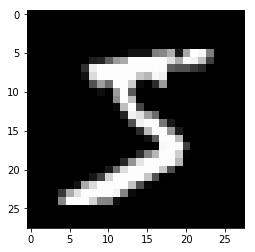

In [20]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap='gray')

In [21]:
test_dataset = dsets.MNIST(root='./data', train=False,
                           transform=transforms.ToTensor(),
                           download=True)

In [22]:
len(test_dataset)

10000

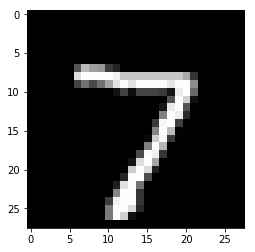

In [23]:
show_img = test_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap='gray')

In [24]:
batch_size = 100
n_iters = 3000

In [25]:
n_epochs = n_iters/(len(train_dataset)/ batch_size)
n_epochs = int(n_epochs)
n_epochs

5

In [26]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [27]:
import collections
isinstance(train_loader, collections.Iterable)

True

In [28]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [30]:
isinstance(test_loader, collections.Iterable)

True

In [31]:
class LogisticRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [32]:
input_dim = 28*28
output_dim =10

model = LogisticRegressionModel(input_dim, output_dim)

In [33]:
criterion = nn.CrossEntropyLoss()

In [34]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
print(model.parameters())

print(len(list(model.parameters())))

print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7f820c488990>
2
torch.Size([10, 784])
torch.Size([10])


In [39]:
iter = 0
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #load images
        
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        #clear gradients
        optimizer.zero_grad()
        
        #forward pass to get output/logits
        
        outputs = model(images)
        
        #calculate loss
        
        loss = criterion(outputs, labels)
        
        #getting gradients wrt parameters
        loss.backward()
        
        #update parameters
        
        optimizer.step()
        
        iter +=1
        if iter% 100 ==0:
            #calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100* correct/total
            print('iteration {}, Loss {}, accuraracy {}'.format(iter, loss.data, accuracy))

iteration 100, Loss 0.3545015752315521, accuraracy 90
iteration 200, Loss 0.305947482585907, accuraracy 90
iteration 300, Loss 0.5044729709625244, accuraracy 90
iteration 400, Loss 0.3183257579803467, accuraracy 90
iteration 500, Loss 0.46942606568336487, accuraracy 90
iteration 600, Loss 0.25938424468040466, accuraracy 90
iteration 700, Loss 0.3445971608161926, accuraracy 90
iteration 800, Loss 0.3660756051540375, accuraracy 90
iteration 900, Loss 0.23713573813438416, accuraracy 90
iteration 1000, Loss 0.30755358934402466, accuraracy 90
iteration 1100, Loss 0.3935457468032837, accuraracy 90
iteration 1200, Loss 0.28688541054725647, accuraracy 90
iteration 1300, Loss 0.3525579869747162, accuraracy 90
iteration 1400, Loss 0.40219566226005554, accuraracy 90
iteration 1500, Loss 0.44357195496559143, accuraracy 90
iteration 1600, Loss 0.26787838339805603, accuraracy 90
iteration 1700, Loss 0.3311287760734558, accuraracy 90
iteration 1800, Loss 0.29131656885147095, accuraracy 90
iteration 1

In [40]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'awesome_model1.pkl')

In [42]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model1.pkl'))